In [37]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import time
import datetime
from datetime import time
import math
import pathlib
import IPython.display as IPydisplay
%matplotlib inline
import os

In [38]:
ticker = input('Input ticker')
file = input('Input the name of the file')
start = input('Input start time frame (format : YYYY-MM-DD H:M:S)')
end = input('End time frame (format : YYYY-MM-DD H:M:S)')
bins_data = input('Do you want volume bins (YES/NO)')
bins_cat = "below_25, mean, 75_percentile, Max"

Input tickerSPY
Input the name of the fileSPY_daily_1_False.csv
Input start time frame (format : YYYY-MM-DD H:M:S)2002-06-23 22:00:00
End time frame (format : YYYY-MM-DD H:M:S)2022-06-21 22:00:00
Do you want volume bins (YES/NO)YES


In [39]:
def bin_function(df):
    
    c = df['Volume'].std()
    
    mean = df['Volume'].mean()

    percent_25 = mean / 2

    max_volume = df['Volume'].max()
    
    percent_75 = mean + (max_volume - mean) / 2

    bins = [0, percent_25, mean, percent_75, max_volume]

    group_labels = ["below_25", "mean", "75_percentile", "Max"]

    print(0, percent_25, mean, percent_75, max_volume)

    df["Range"] = pd.cut(df["Volume"], bins, labels=group_labels)

    df["%Gain"] = (df["NextDay_open"] - df["Close"]) / df["Close"] * 100

    df["Range of the day"] = df["High"] - df["Low"]
    
    binary = []
    
    for x in df["%Gain"]:
        if x < 0:
            binary.append(0)
        else:
            binary.append(1)
    df["R/G"] = binary

    df = df.dropna()
    
    return df

In [40]:
def plot_data(df, ticker, start, end):
    start = datetime.datetime.strptime(f'{start}', '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(f'{end}', '%Y-%m-%d %H:%M:%S')
    sdf = (df.index > start) & (df.index < end)
    var_edit = [mpf.make_addplot(df.loc[sdf, ('100dayEWM', '50dayEWM', '10dayEWM')]),
                mpf.make_addplot(df.loc[sdf, ticker], type='scatter', marker = '^', color = 'black')
               ]
    
    display(mpf.plot(df.loc[sdf], type = 'candle', style = 'yahoo', addplot = var_edit, volume=True))

In [41]:
def cat_sort(range_info, df):
    test = []
    for x, row in df.iterrows():
        if row['Range'] == range_info:
            test.append(row['Low'])
        else:
            test.append(np.nan)
    df[f"{range_info}"] = test
    return df

In [43]:
def analyze_chart(ticker, file, start, end):
    df = pd.read_csv(f"Extracting_Data/{ticker}/{file}")
    x = []

    df = df.set_index('Datetime')
    df.index = pd.to_datetime(df.index)
    
    df['Previous_Low'] = df['Low'].shift(1)
    df['NextDay_open'] = df['Open'].shift(-1)
    df['NextDay_Volume'] = df['Volume'].shift(-1)
    
    if bins_data == 'YES':
        tickers_list = bins_cat.split(", ")
        df = bin_function(df)
        
        for i in tickers_list:
            df = cat_sort(i, df)


    df['50dayEWM'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['100dayEWM'] = df['Close'].ewm(span=100, adjust=False).mean()
    df['10dayEWM'] = df['Close'].ewm(span=10, adjust=False).mean()
    
    plot_data(df, "mean", start, end)

    
    return df

0 60964750.49304866 121929500.98609732 496738195.49304867 871546890


/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


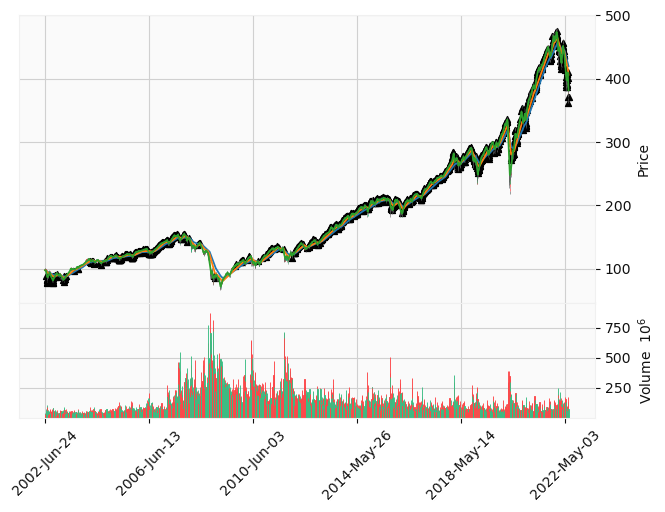

None

In [44]:
data_df = analyze_chart(ticker, file, start, end)

In [45]:
data_df

,Open,Close,High,Low,Volume,Gain%,Previous_Low,NextDay_open,NextDay_Volume,Range,%Gain,Range of the day,R/G,below_25,mean,75_percentile,Max,50dayEWM,100dayEWM,10dayEWM
Datetime,,,,,,,,,,,,,,,,,,,,
2002-06-24 22:00:00,100.30,97.56,100.890,97.5400,33355000,-2.731805,97.2500,95.20,37913600.0,below_25,-2.419024,3.3500,0,97.54,NaN,NaN,NaN,97.560000,97.560000,97.560000
2002-06-25 22:00:00,95.20,97.72,98.150,95.1900,37913600,2.647059,97.5400,98.50,31616400.0,below_25,0.798199,2.9600,1,95.19,NaN,NaN,NaN,97.566275,97.563168,97.589091
2002-06-26 22:00:00,98.50,99.43,99.490,96.5700,31616400,0.944162,95.1900,99.24,28184200.0,below_25,-0.191089,2.9200,0,96.57,NaN,NaN,NaN,97.639362,97.600135,97.923802
2002-06-27 22:00:00,99.24,98.96,100.500,98.8800,28184200,-0.282144,96.5700,99.18,20270200.0,below_25,0.222312,1.6200,1,98.88,NaN,NaN,NaN,97.691152,97.627063,98.112201
2002-06-30 22:00:00,99.18,97.03,99.800,96.8900,20270200,-2.167776,98.8800,96.86,34213900.0,below_25,-0.175204,2.9100,0,96.89,NaN,NaN,NaN,97.665224,97.615240,97.915437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 22:00:00,376.85,373.87,377.940,370.5900,104011831,-0.790766,373.3000,377.36,125666797.0,mean,0.933480,7.3500,1,NaN,370.59,NaN,NaN,412.373061,424.149000,394.944512
2022-06-14 22:00:00,377.36,379.20,383.900,372.1200,125666797,0.487598,370.5900,370.51,134473288.0,75_percentile,-2.291667,11.7800,0,NaN,NaN,372.1200,NaN,411.072156,423.258921,392.081873
2022-06-15 22:00:00,370.51,366.65,370.940,364.0799,134473288,-1.041807,372.1200,365.51,111113904.0,75_percentile,-0.310923,6.8601,0,NaN,NaN,364.0799,NaN,409.330111,422.137952,387.457896


In [46]:
data_df["Gain_Loss"] = data_df["NextDay_open"] - data_df["Close"]

In [47]:
mypath = f"{ticker}/graph"
if not os.path.isdir(mypath):
    os.makedirs(mypath)
    
upload_file = f"{ticker}/graph/graph_{file}"
data_df.to_csv(upload_file)

In [ ]:
msft = analyze_chart("MSFT", "MSFT_minute_15_False.csv", "2021-03-21 22:00:00", "2022-03-21 22:00:00")

In [ ]:
msft

In [ ]:
msft.info()

In [ ]:
plot_data(msft, '75_percentile', "2021-03-21 22:00:00", "2022-03-21 22:00:00")

In [ ]:
plot_data(msft, 'Max', "2021-03-21 22:00:00", "2022-03-21 22:00:00")

In [ ]:
data_df.info()

In [ ]:
plot_data(data_df, '75_percentile', start, end)

In [ ]:
plot_data(data_df, 'mean', start, end)

In [ ]:
plot_data(data_df, 'below_25', start, end)

In [ ]:
data_df.loc[data_df.index == '2022-03-16 9:00:00']

In [ ]:
#note intital analysis looks like mean volume seems to be trend with max volume fakeout #below_25 consolidation

In [ ]:
fig = plot_data(data, 'below_25', start, end)

In [ ]:
data

In [ ]:
fig = plot_data(data, '75_percentile', start, end)

In [ ]:
fig

In [ ]:
data = cat_sort('below_25', data_df)

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data['mean'].dropna()

In [ ]:
max = data.loc[data.index, ['Max', 'Gain%', 'Volume']].dropna()

In [ ]:
max

In [ ]:
data_df

In [ ]:
data_df.groupby('Max')

In [ ]:
data_df.loc[(data_df['Close'] > data_df['50dayEWM'])]

In [ ]:
data_df.loc[(data_df['Close'] > data_df['100dayEWM'])].head(20)

In [ ]:
df = data_df.loc[(data_df.index == '2022-03-07 04:15:00')]
(df["Close"] - df['Open']) / df['Open'] * 100

In [ ]:
data_df

In [ ]:
data_set_df = analyze_chart('MSFT', 'MSFT_daily_1_False.csv', '2021-03-16 22:00:00', '2022-03-16 22:00:00')